First created By Truman Daniels on 11/8/18 to quantitatively compare nba team coaching

This version created on 11/13/18 with data scraped from that time too

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statistics import mean, median

In [2]:
#importing the csvs from the webscraper 
offopen = pd.read_csv('~/Documents/NBA/offopen2019.csv', index_col = 'Team')
offwide = pd.read_csv('~/Documents/NBA/offwide2019.csv', index_col = 'Team')
defopen = pd.read_csv('~/Documents/NBA/defopen2019.csv', index_col = 'Team')
defwide = pd.read_csv('~/Documents/NBA/defwide2019.csv', index_col = 'Team')
offzone = pd.read_csv('~/Documents/NBA/offshootingzone2019.csv', index_col = 'Team')
defzone = pd.read_csv('~/Documents/NBA/defshootingzone2019.csv', index_col = 'Team')

#for dfs offzone, defzone: FGM.n, FGA.n, FG%.n, n=0 are shots in the restricted area, n=1 are shots in the paint (not in RA)
#n=2 are midrange shots (not in the paint), n=3, n=4 are 3pt shots in the right and left corner, n=5 are 3pt shots above the break

In [21]:
(2*offzone['FGM'] + (3 * offzone['FGM.5'] + offzone['FGM.4'])) / (offzone['FGA'] + offzone['FGA.5'] + offzone['FGA.4'])

Team
Atlanta Hawks             1.048513
Boston Celtics            1.064912
Brooklyn Nets             1.062802
Charlotte Hornets         1.098497
Chicago Bulls             1.098513
Cleveland Cavaliers       1.088757
Dallas Mavericks          1.143590
Denver Nuggets            1.078809
Detroit Pistons           1.039801
Golden State Warriors     1.241650
Houston Rockets           1.016667
Indiana Pacers            1.173824
LA Clippers               1.111517
Los Angeles Lakers        1.144737
Memphis Grizzlies         1.145418
Miami Heat                1.120629
Milwaukee Bucks           1.190000
Minnesota Timberwolves    1.077213
New Orleans Pelicans      1.178571
New York Knicks           1.049123
Oklahoma City Thunder     1.066451
Orlando Magic             1.130019
Philadelphia 76ers        1.093474
Phoenix Suns              1.059891
Portland Trail Blazers    1.077170
Sacramento Kings          1.231499
San Antonio Spurs         1.116071
Toronto Raptors           1.131980
Utah Jazz      

In [14]:
#I'm aggregating all of the open and wide open shot categories from stats.nba.com (since these are seperated in their tables)
df = pd.DataFrame({'Combined-Off': offwide['3PA']+offwide['2FGA']+offopen['3PA']+offopen['2FGA'], 
                   'Combined-Def': (defwide['3PA']+defwide['2FGA']+defopen['3PA']+defopen['2FGA']),
                   'Shots Per Game': offzone['FGA'] + offzone['FGA.1'] + offzone['FGA.2'] + offzone['FGA.3'] + offzone['FGA.4'] + offzone['FGA.5'],
                   'Shots Defended Per Game': defzone['FGA'] + defzone['FGA.1'] + defzone['FGA.2'] + defzone['FGA.3'] + defzone['FGA.4'] + defzone['FGA.5'],
                   'eFG% Of All Open Shots': round(100 * (offopen['FGM'] + offwide['FGM'] + 0.5*(offopen['3PM']+offwide['3PM'])) / (offopen['FGA'] + offwide['FGA']), 2),
                   'Midrange + Paint shots taken': offzone['FGA.1']+offzone['FGA.2'],
                   'Midrange + Paint shots allowed': defzone['FGA.1'] + defzone['FGA.2'],
                   'Wide Open Shots Taken': offwide['FGA'],
                   'Wide Open Shots Allowed': defwide['FGA'],
                  }) 
df['Open Shot Taken %'] = round(100 * (df['Combined-Off'] / df['Shots Per Game']), 3)
df['Open Shot Allowed %'] = round(100 * (df['Combined-Def'] / df['Shots Defended Per Game']), 3)
df['Good Shots Taken %'] = 100-round(100 * (df['Midrange + Paint shots taken'] / df['Shots Per Game']), 3)
df['Good Shots Allowed %'] = 100-round(100 * (df['Midrange + Paint shots allowed'] / df['Shots Defended Per Game']), 3)
df['Bad Shots Taken %'] = 100-df['Good Shots Taken %']
df['Bad Shots FG%'] = 100 * round((offzone['FGM.1'] + offzone['FGM.2']) / (offzone['FGA.1'] + offzone['FGA.2']), 3)
df['Team'] = df.index

df.head(n=30) #taking a quick look at our new dataframe

,Combined-Off,Combined-Def,Shots Per Game,Shots Defended Per Game,eFG% Of All Open Shots,Midrange + Paint shots taken,Midrange + Paint shots allowed,Wide Open Shots Taken,Wide Open Shots Allowed,Open Shot Taken %,Open Shot Allowed %,Good Shots Taken %,Good Shots Allowed %,Bad Shots Taken %,Bad Shots FG%,Team
Atlanta Hawks,47.9,47.7,88.1,90.8,53.44,19.0,27.2,21.9,23.4,54.370,52.533,78.434,70.044,21.566,38.9,Atlanta Hawks
Boston Celtics,53.5,46.3,89.9,88.1,50.75,29.4,26.5,24.7,20.5,59.511,52.554,67.297,69.921,32.703,37.4,Boston Celtics
Brooklyn Nets,42.5,41.7,88.9,87.1,57.14,23.4,33.5,19.6,17.6,47.807,47.876,73.678,61.538,26.322,39.7,Brooklyn Nets
Charlotte Hornets,43.2,44.1,91.8,88.6,58.10,28.8,24.1,18.5,19.8,47.059,49.774,68.627,72.799,31.373,43.1,Charlotte Hornets
Chicago Bulls,43.3,48.9,86.9,91.3,50.81,28.5,27.1,19.5,20.9,49.827,53.560,67.204,70.318,32.796,37.2,Chicago Bulls
Cleveland Cavaliers,39.9,42.8,87.7,86.1,50.63,33.7,25.3,14.8,17.9,45.496,49.710,61.574,70.616,38.426,38.9,Cleveland Cavaliers
Dallas Mavericks,45.6,46.0,86.2,86.1,52.96,24.2,29.8,22.0,18.5,52.900,53.426,71.926,65.389,28.074,38.4,Dallas Mavericks
Denver Nuggets,44.3,39.5,87.8,82.8,52.26,27.6,22.1,20.2,17.6,50.456,47.705,68.565,73.309,31.435,43.5,Denver Nuggets
Detroit Pistons,47.7,43.3,94.0,86.9,47.90,29.3,34.0,23.3,17.6,50.745,49.827,68.830,60.875,31.170,37.9,Detroit Pistons
Golden State Warriors,44.1,48.5,88.1,89.9,62.19,34.1,27.4,17.4,22.4,50.057,53.949,61.294,69.522,38.706,48.4,Golden State Warriors


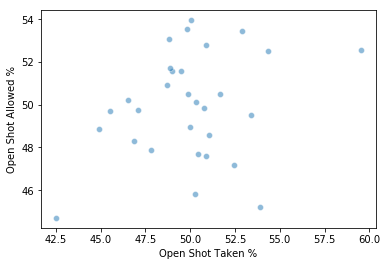

In [5]:
sns.scatterplot(x = df['Open Shot Taken %'], y = df['Open Shot Allowed %'], palette = 'pastel',alpha = .50)
# A quick scatterplot reveals that this data desperately needs labels

The code chunk below creates a pretty graph and adds labels

In [6]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x']+.1, point['y']+.1, str(point['val']),fontsize=20)

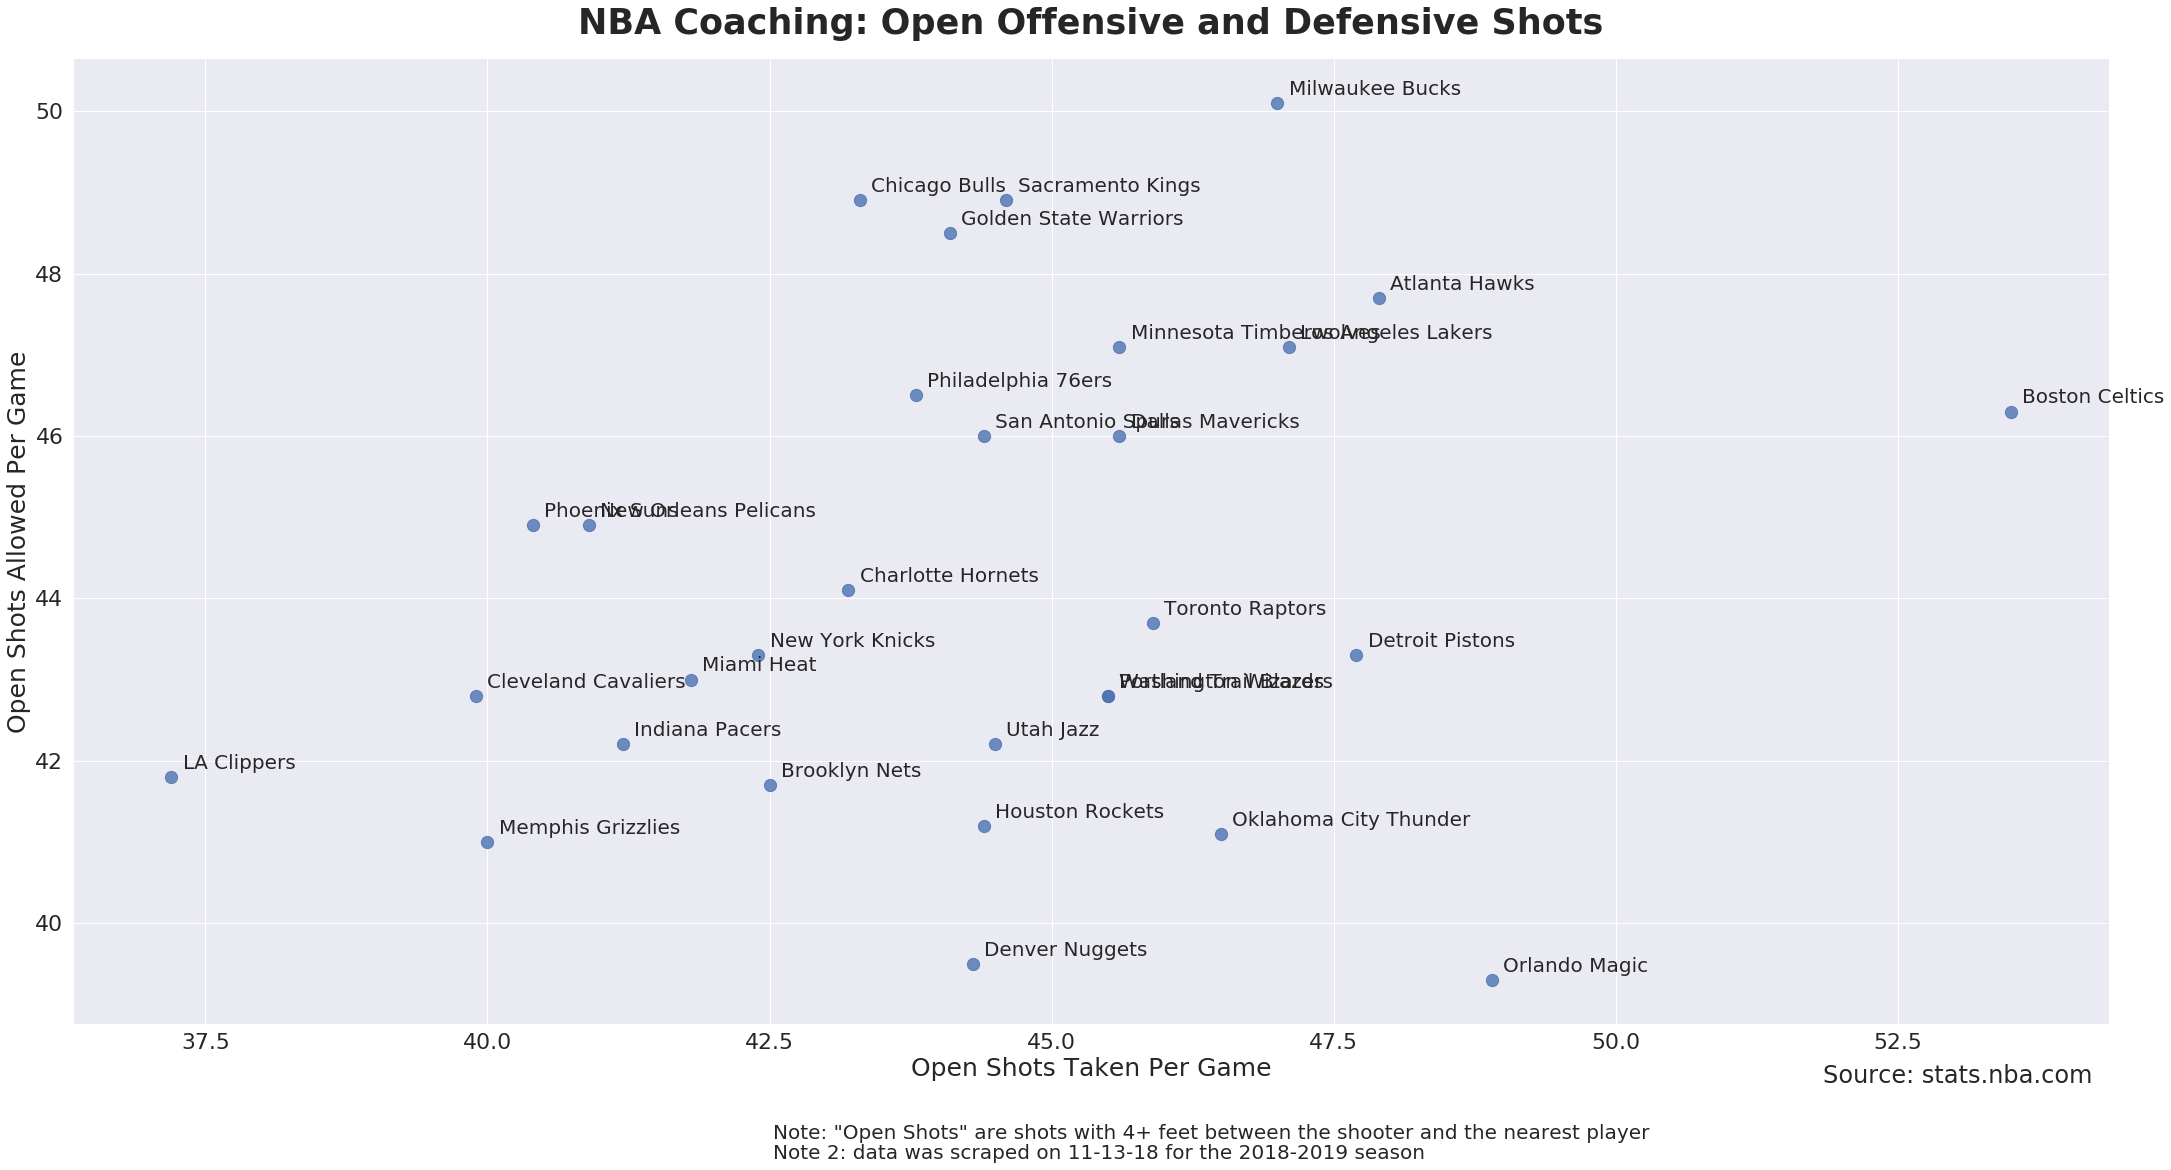

In [7]:
sns.set(font_scale=2)
ax = sns.lmplot('Combined-Off', # Horizontal axis
        'Combined-Def', # Vertical axis
        data=df, # Data source
        fit_reg=False, # Don't fix a regression line
        markers='o',
        scatter_kws={"s": 150}, #Changes the Marker Size
        height=15,
        palette='deep',
        aspect=2) # size and dimension

plt.title('NBA Coaching: Open Offensive and Defensive Shots', pad=25, fontsize=35, weight = 600)
# Set x-axis label
plt.xlabel('Open Shots Taken Per Game', fontsize=25)
# Set y-axis label
plt.ylabel('Open Shots Allowed Per Game', fontsize=25)
plt.annotate('Source: stats.nba.com', (0, 0), (1750, -40), xycoords='axes fraction', textcoords='offset points', va='top')

plt.annotate('Note: "Open Shots" are shots with 4+ feet between the shooter and the nearest player', (0, 0), (700, -100), xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 20)
plt.annotate('Note 2: data was scraped on 11-13-18 for the 2018-2019 season', (0, 0), (700, -120), xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 20)


label_point(df['Combined-Off'], df['Combined-Def'], df['Team'], plt.gca())  

#Saves our graph to a file called output.png
ax.savefig("off-and-def-shots-pg.png")

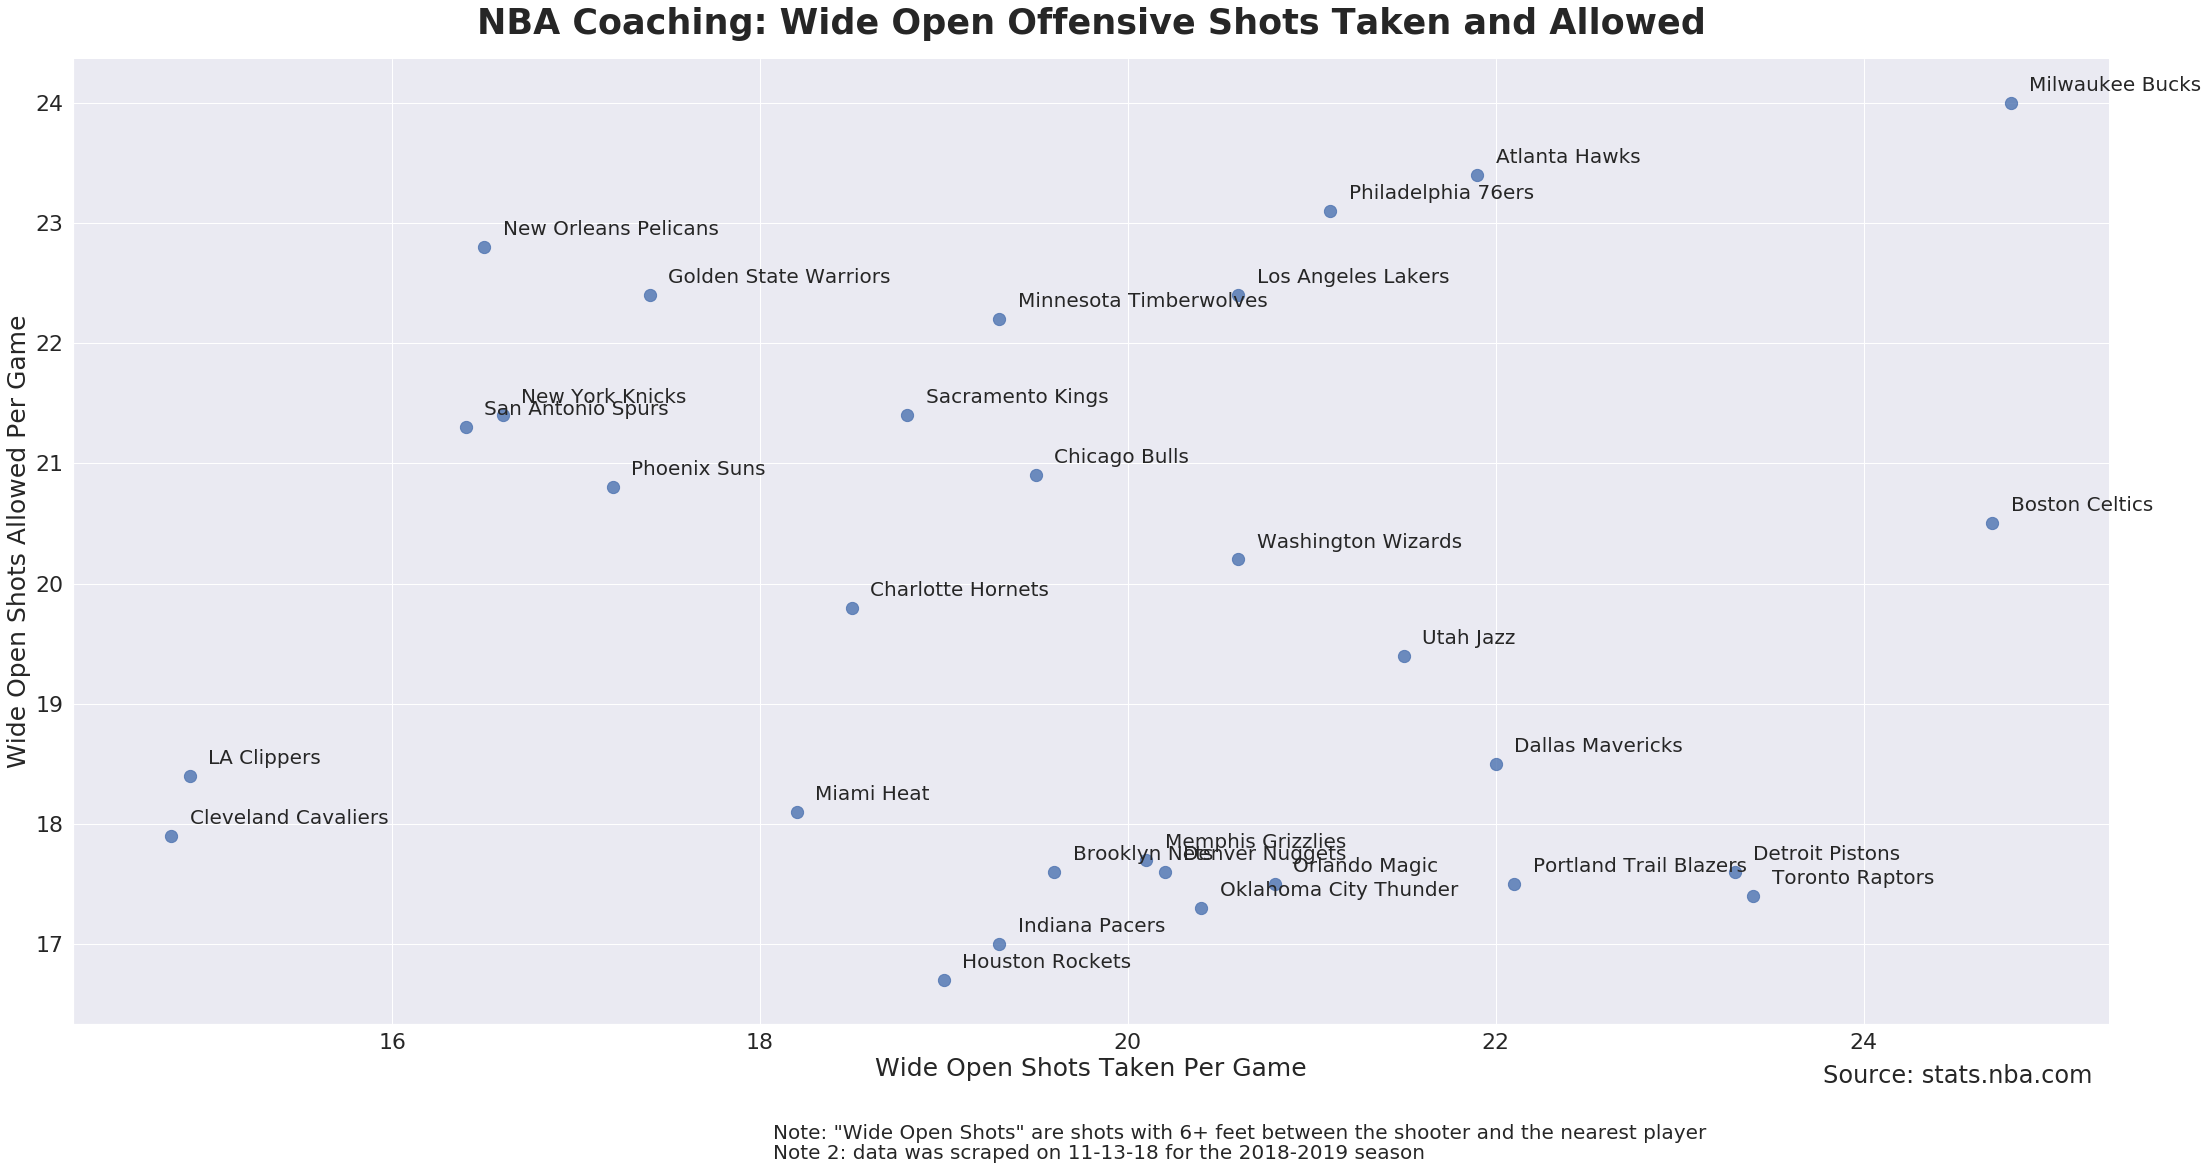

In [8]:
sns.set(font_scale=2)
ax6 = sns.lmplot('Wide Open Shots Taken', # Horizontal axis
        'Wide Open Shots Allowed', # Vertical axis
        data=df, # Data source
        fit_reg=False, # Don't fix a regression line
        markers='o',
        scatter_kws={"s": 150}, #Changes the Marker Size
        height=15,
        palette='deep',
        aspect=2) # size and dimension

plt.title('NBA Coaching: Wide Open Offensive Shots Taken and Allowed', pad=25, fontsize=35, weight = 600)
# Set x-axis label
plt.xlabel('Wide Open Shots Taken Per Game', fontsize=25)
# Set y-axis label
plt.ylabel('Wide Open Shots Allowed Per Game', fontsize=25)
plt.annotate('Source: stats.nba.com', (0, 0), (1750, -40), xycoords='axes fraction', textcoords='offset points', va='top')

plt.annotate('Note: "Wide Open Shots" are shots with 6+ feet between the shooter and the nearest player', (0, 0), (700, -100), xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 20)
plt.annotate('Note 2: data was scraped on 11-13-18 for the 2018-2019 season', (0, 0), (700, -120), xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 20)


label_point(df['Wide Open Shots Taken'], df['Wide Open Shots Allowed'], df['Team'], plt.gca())  

#Saves our graph to a file called output.png
ax6.savefig("wide-open-off-vs-def.png")

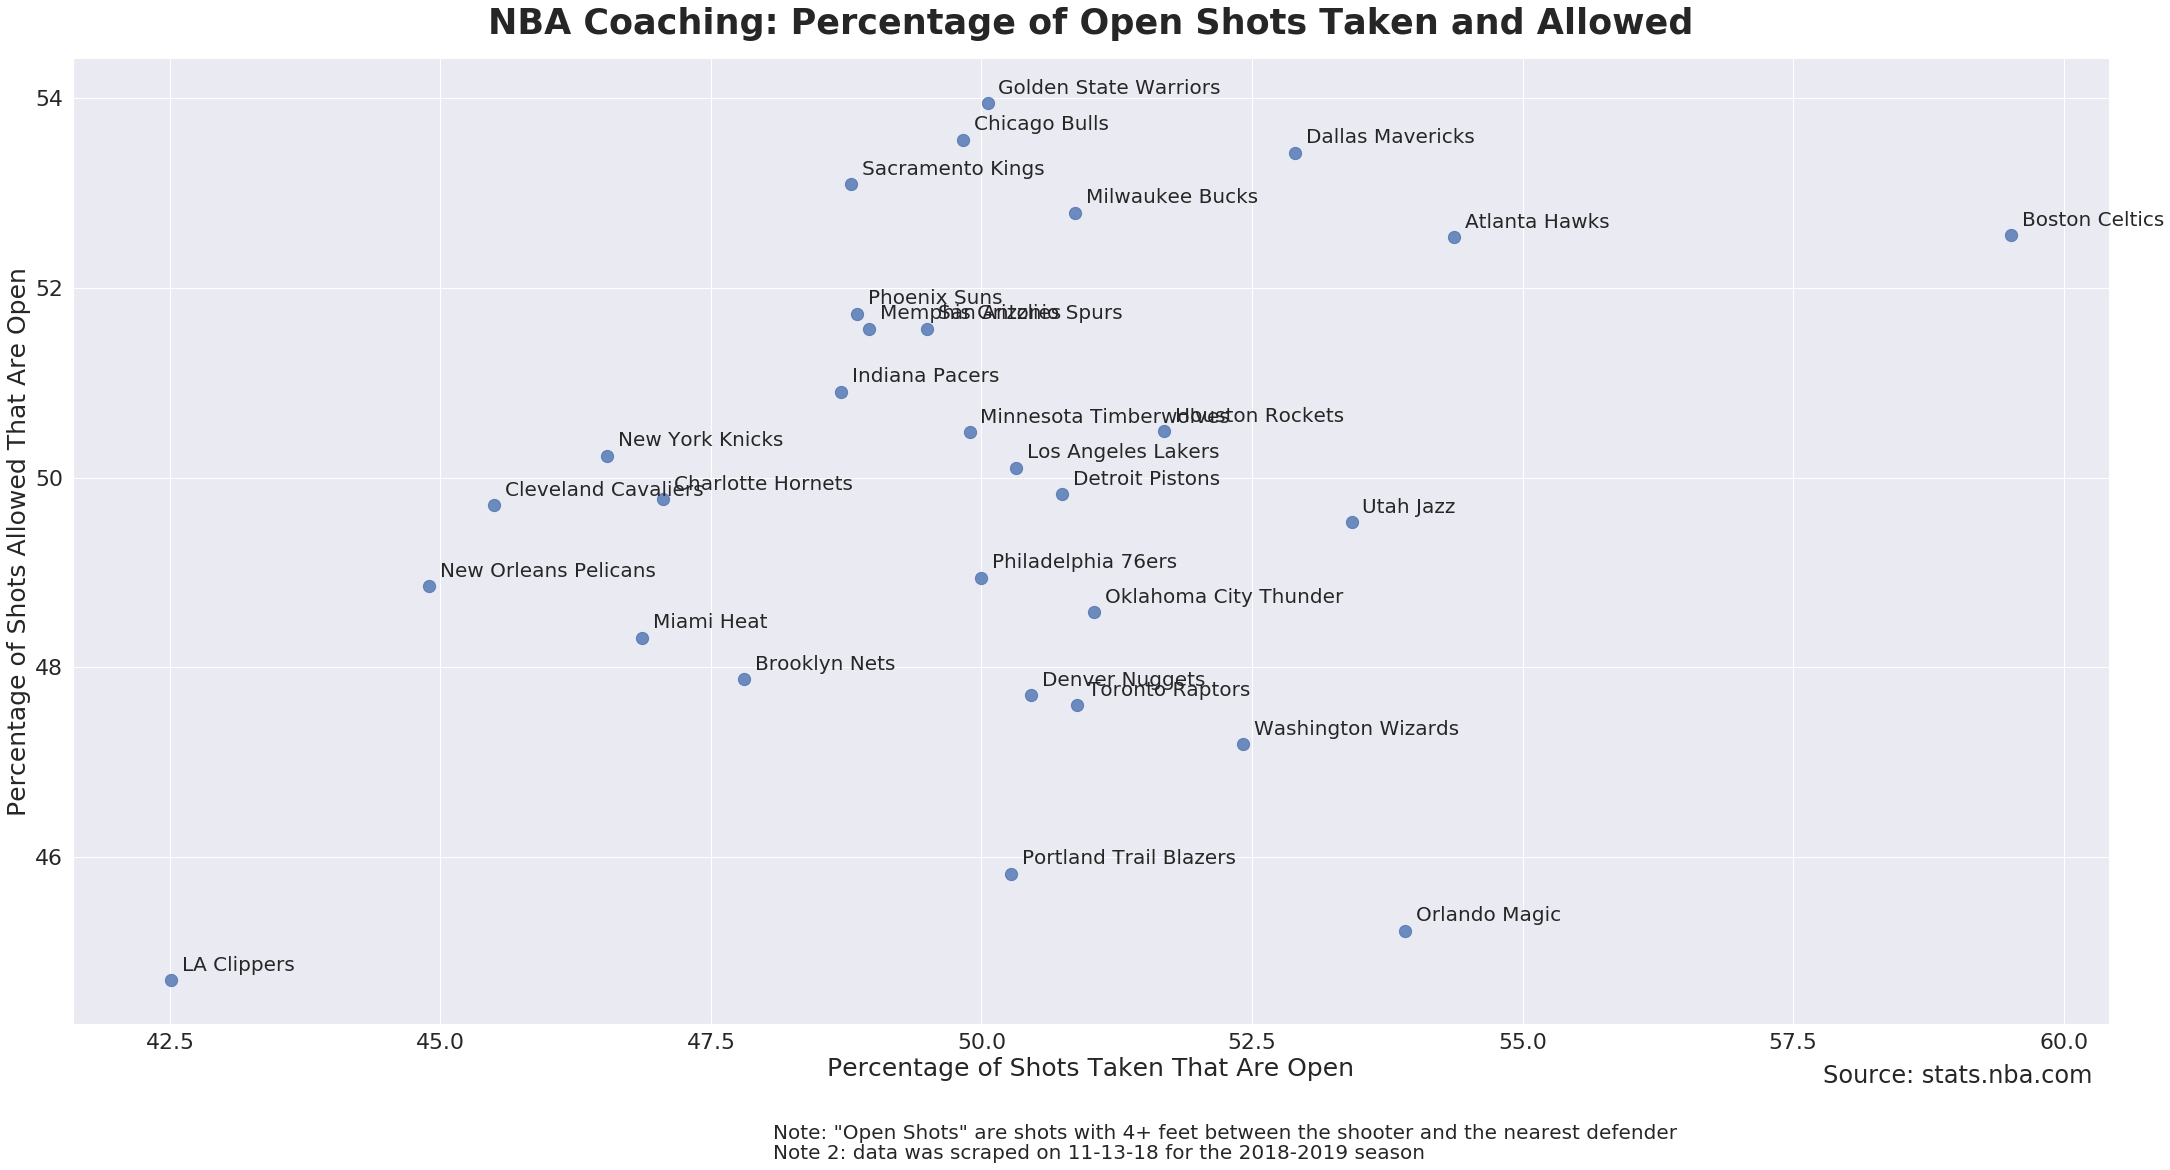

In [9]:
sns.set(font_scale=2)
ax2 = sns.lmplot('Open Shot Taken %', # Horizontal axis
        'Open Shot Allowed %', # Vertical axis
        data=df, # Data source
        fit_reg=False, # Don't fix a regression line
        markers='o',
        scatter_kws={"s": 150}, #Changes the Marker Size
        height=15,
        palette='deep',
        aspect=2) # size and dimension

plt.title('NBA Coaching: Percentage of Open Shots Taken and Allowed', pad=25, fontsize=35, weight = 600)
# Set x-axis label
plt.xlabel('Percentage of Shots Taken That Are Open', fontsize=25)
# Set y-axis label
plt.ylabel('Percentage of Shots Allowed That Are Open', fontsize=25)
plt.annotate('Source: stats.nba.com', (0, 0), (1750, -40), xycoords='axes fraction', textcoords='offset points', va='top')

plt.annotate('Note: "Open Shots" are shots with 4+ feet between the shooter and the nearest defender', (0, 0), (700, -100), xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 20)
plt.annotate('Note 2: data was scraped on 11-13-18 for the 2018-2019 season', (0, 0), (700, -120), xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 20)

label_point(df['Open Shot Taken %'], df['Open Shot Allowed %'], df['Team'], plt.gca())  

ax2.savefig("perc-open-taken-vs-allowed.png")

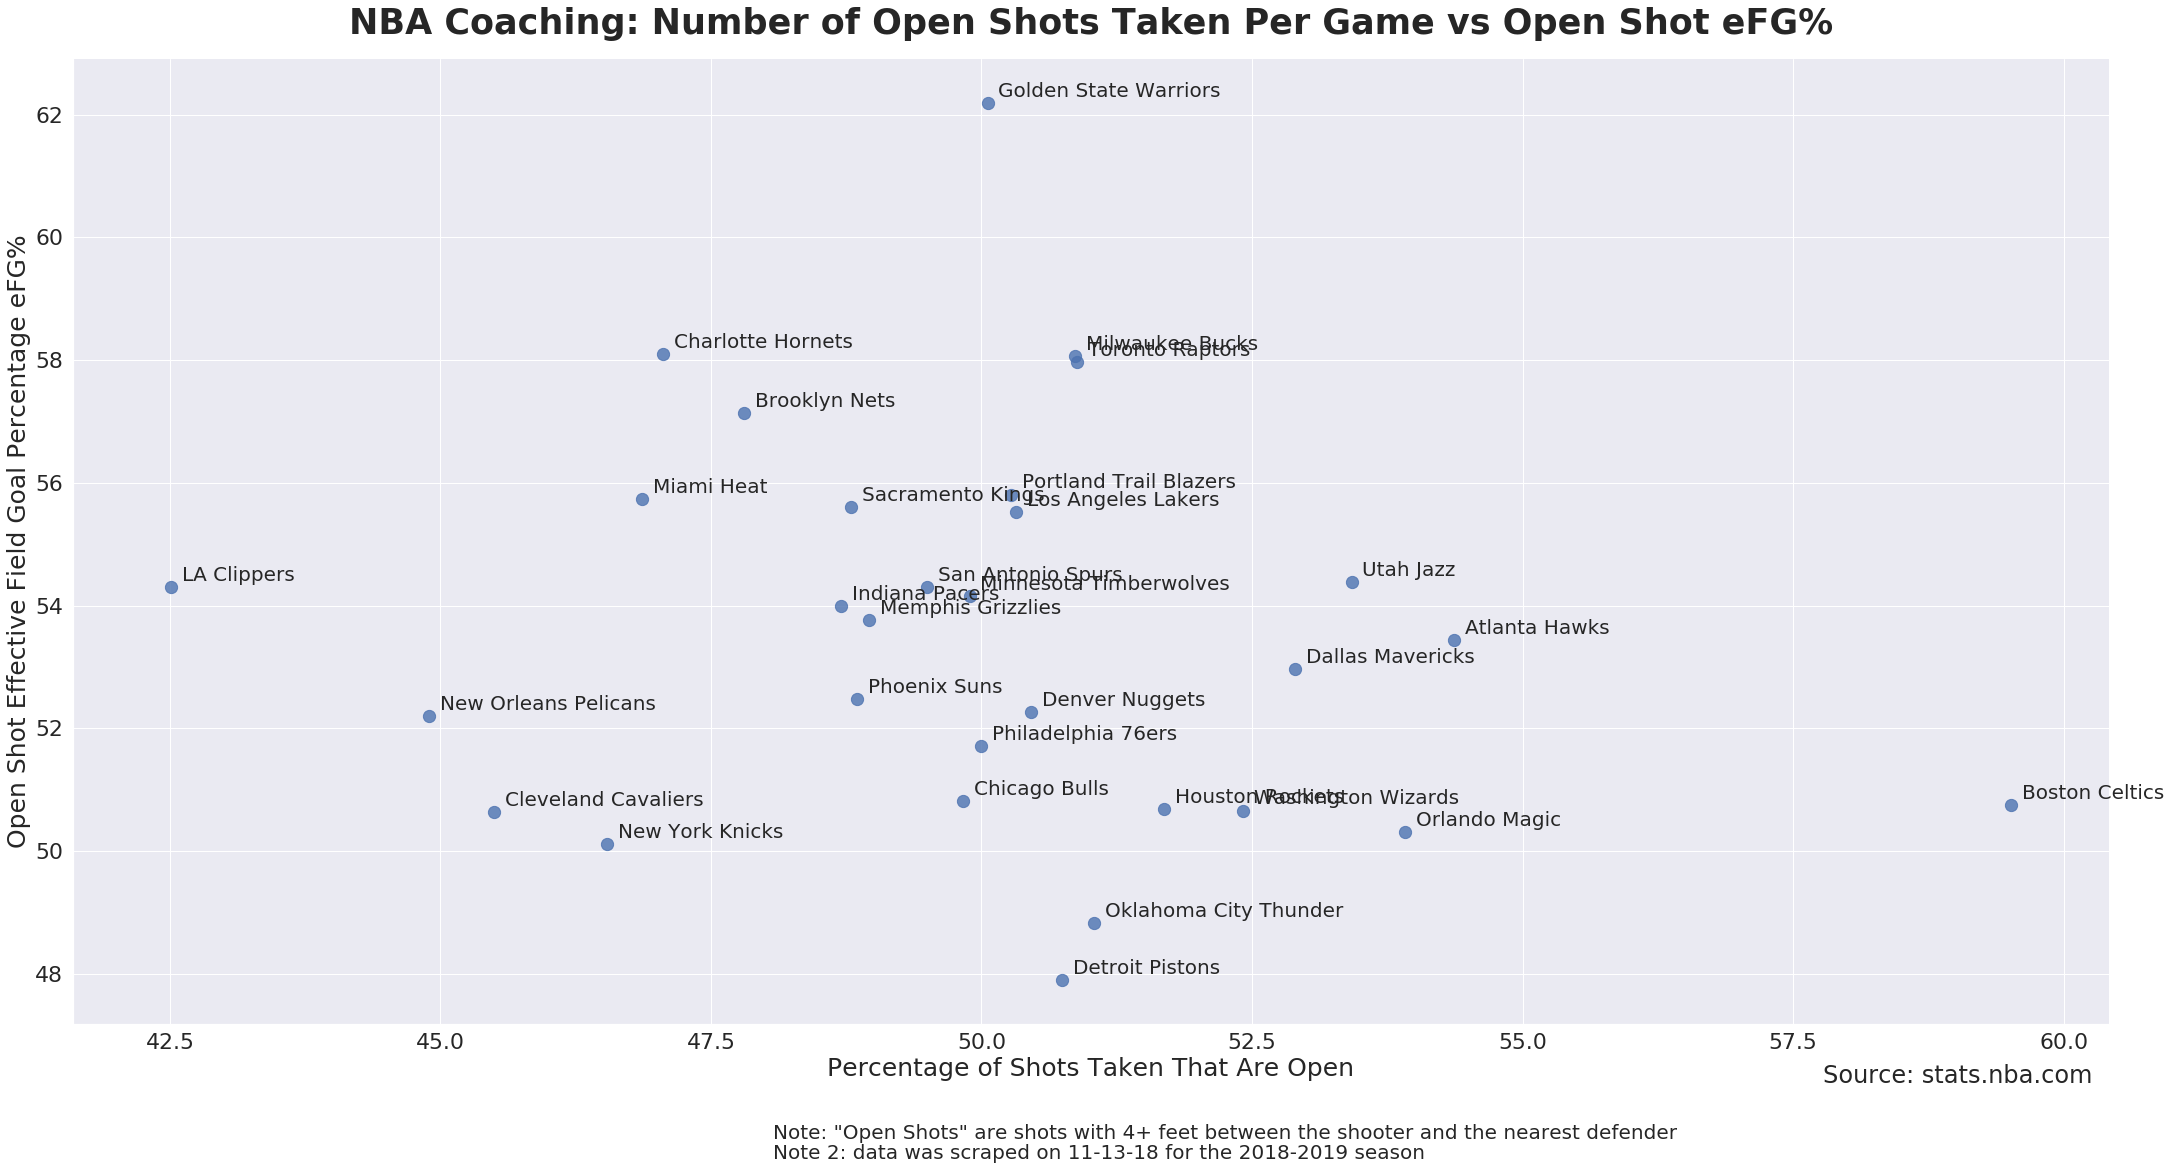

In [17]:
sns.set(font_scale=2)
ax3 = sns.lmplot('Open Shot Taken %', # Horizontal axis
        'eFG% Of All Open Shots', # Vertical axis
        data=df, # Data source
        fit_reg=False, # Don't fix a regression line
        markers='o',
        scatter_kws={"s": 150}, #Changes the Marker Size
        height=15,
        palette='deep',
        aspect=2) # size and dimension

plt.title('NBA Coaching: Number of Open Shots Taken Per Game vs Open Shot eFG%', pad=25, fontsize=35, weight = 600)
# Set x-axis label
plt.xlabel('Percentage of Shots Taken That Are Open', fontsize=25)
# Set y-axis label
plt.ylabel('Open Shot Effective Field Goal Percentage eFG%', fontsize=25)
plt.annotate('Source: stats.nba.com', (0, 0), (1750, -40), xycoords='axes fraction', textcoords='offset points', va='top')

plt.annotate('Note: "Open Shots" are shots with 4+ feet between the shooter and the nearest defender', (0, 0), (700, -100), xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 20)
plt.annotate('Note 2: data was scraped on 11-13-18 for the 2018-2019 season', (0, 0), (700, -120), xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 20)


label_point(df['Open Shot Taken %'], df['eFG% Of All Open Shots'], df['Team'], plt.gca())

ax3.savefig("open-taken-vs-open-efg.png")

Finding the Expected Value of certain shot types:

In [11]:
print('Expected Value Of Shots Within the Restricted Area: ' + str(round(2*(mean(offzone['FGM']) / mean(offzone['FGA'])),2)))
print('Expected Value Of Shots in the Paint (Not RA): ' + str(round(2*(mean(offzone['FGM.1']) / mean(offzone['FGA.1'])),2)))
print('Expected Value Of Midrange Shots: ' + str(round(2*(mean(offzone['FGM.2']) / mean(offzone['FGA.2'])),2)))
print("Expected Value Of Corner 3's: " + str(round(3*(mean(offzone['FGM.3'] + offzone['FGM.4']) / mean(offzone['FGA.3'] + offzone['FGA.4'])),2)))
print("Expected Value Of 3's Above the Break: " + str(round(3*(mean(offzone['FGM.5']) / mean(offzone['FGA.5'])),2)))

Expected Value Of Shots Within the Restricted Area: 1.25
Expected Value Of Shots in the Paint (Not RA): 0.78
Expected Value Of Midrange Shots: 0.81
Expected Value Of Corner 3's: 1.13
Expected Value Of 3's Above the Break: 1.04


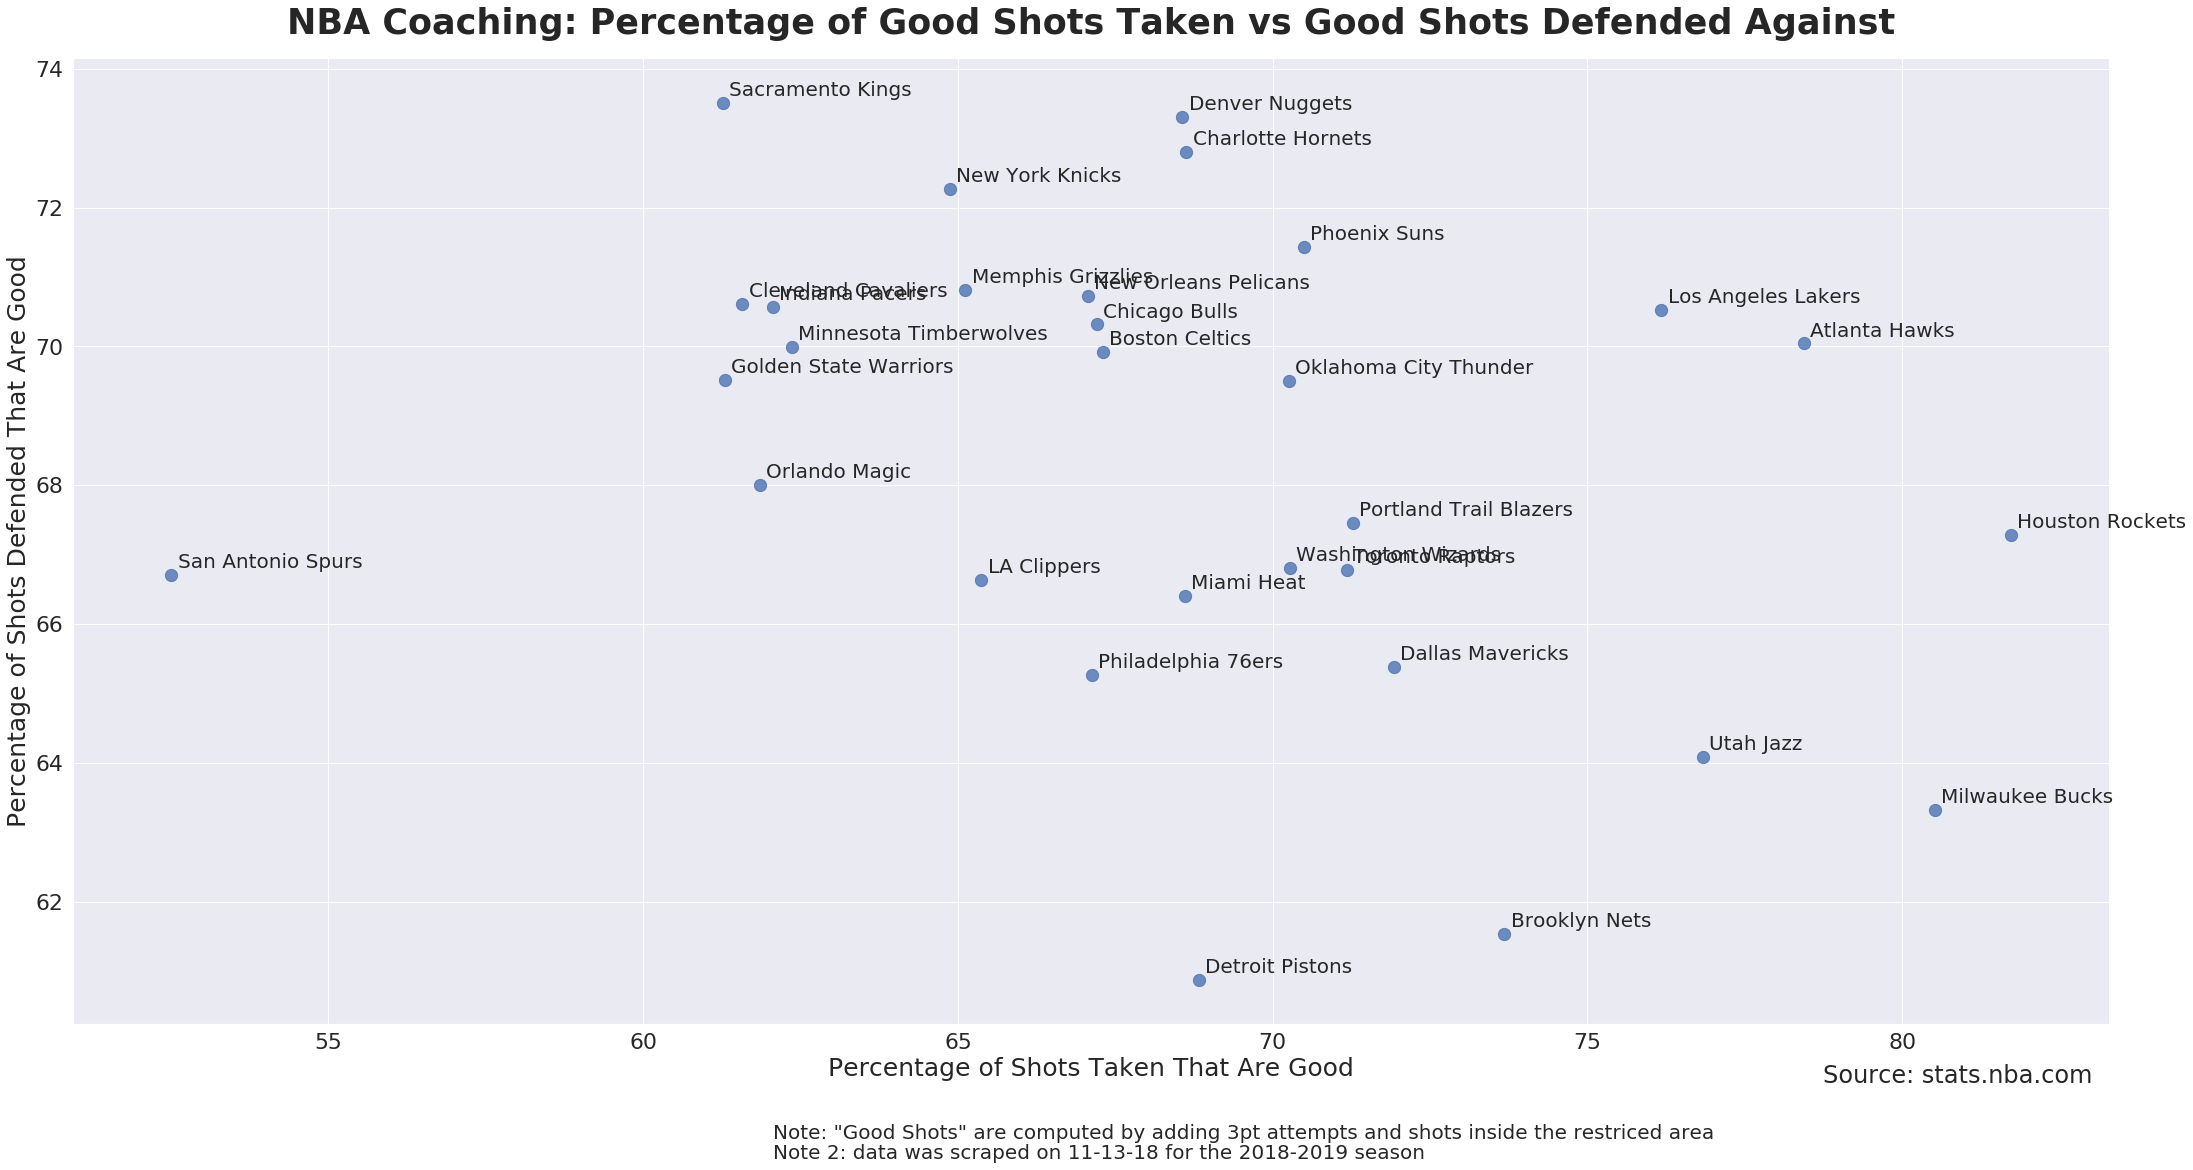

In [16]:
sns.set(font_scale=2)
ax4 = sns.lmplot('Good Shots Taken %', # Horizontal axis
        'Good Shots Allowed %', # Vertical axis
        data=df, # Data source
        fit_reg=False, # Don't fix a regression line
        markers='o',
        scatter_kws={"s": 150}, #Changes the Marker Size
        height=15,
        palette='deep',
        aspect=2) # size and dimension

plt.title('NBA Coaching: Percentage of Good Shots Taken vs Good Shots Defended Against', pad=25, fontsize=35, weight = 600)
# Set x-axis label
plt.xlabel('Percentage of Shots Taken That Are Good', fontsize=25)
# Set y-axis label
plt.ylabel('Percentage of Shots Defended That Are Good', fontsize=25)
plt.annotate('Source: stats.nba.com', (0, 0), (1750, -40), xycoords='axes fraction', textcoords='offset points', va='top')



plt.annotate('Note: "Good Shots" are computed by adding 3pt attempts and shots inside the restriced area', (0, 0), (700, -100), xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 20)
plt.annotate('Note 2: data was scraped on 11-13-18 for the 2018-2019 season', (0, 0), (700, -120), xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 20)


label_point(df['Good Shots Taken %'], df['Good Shots Allowed %'], df['Team'], plt.gca())
ax4.savefig("good-shots-taken-vs-allowed.png")

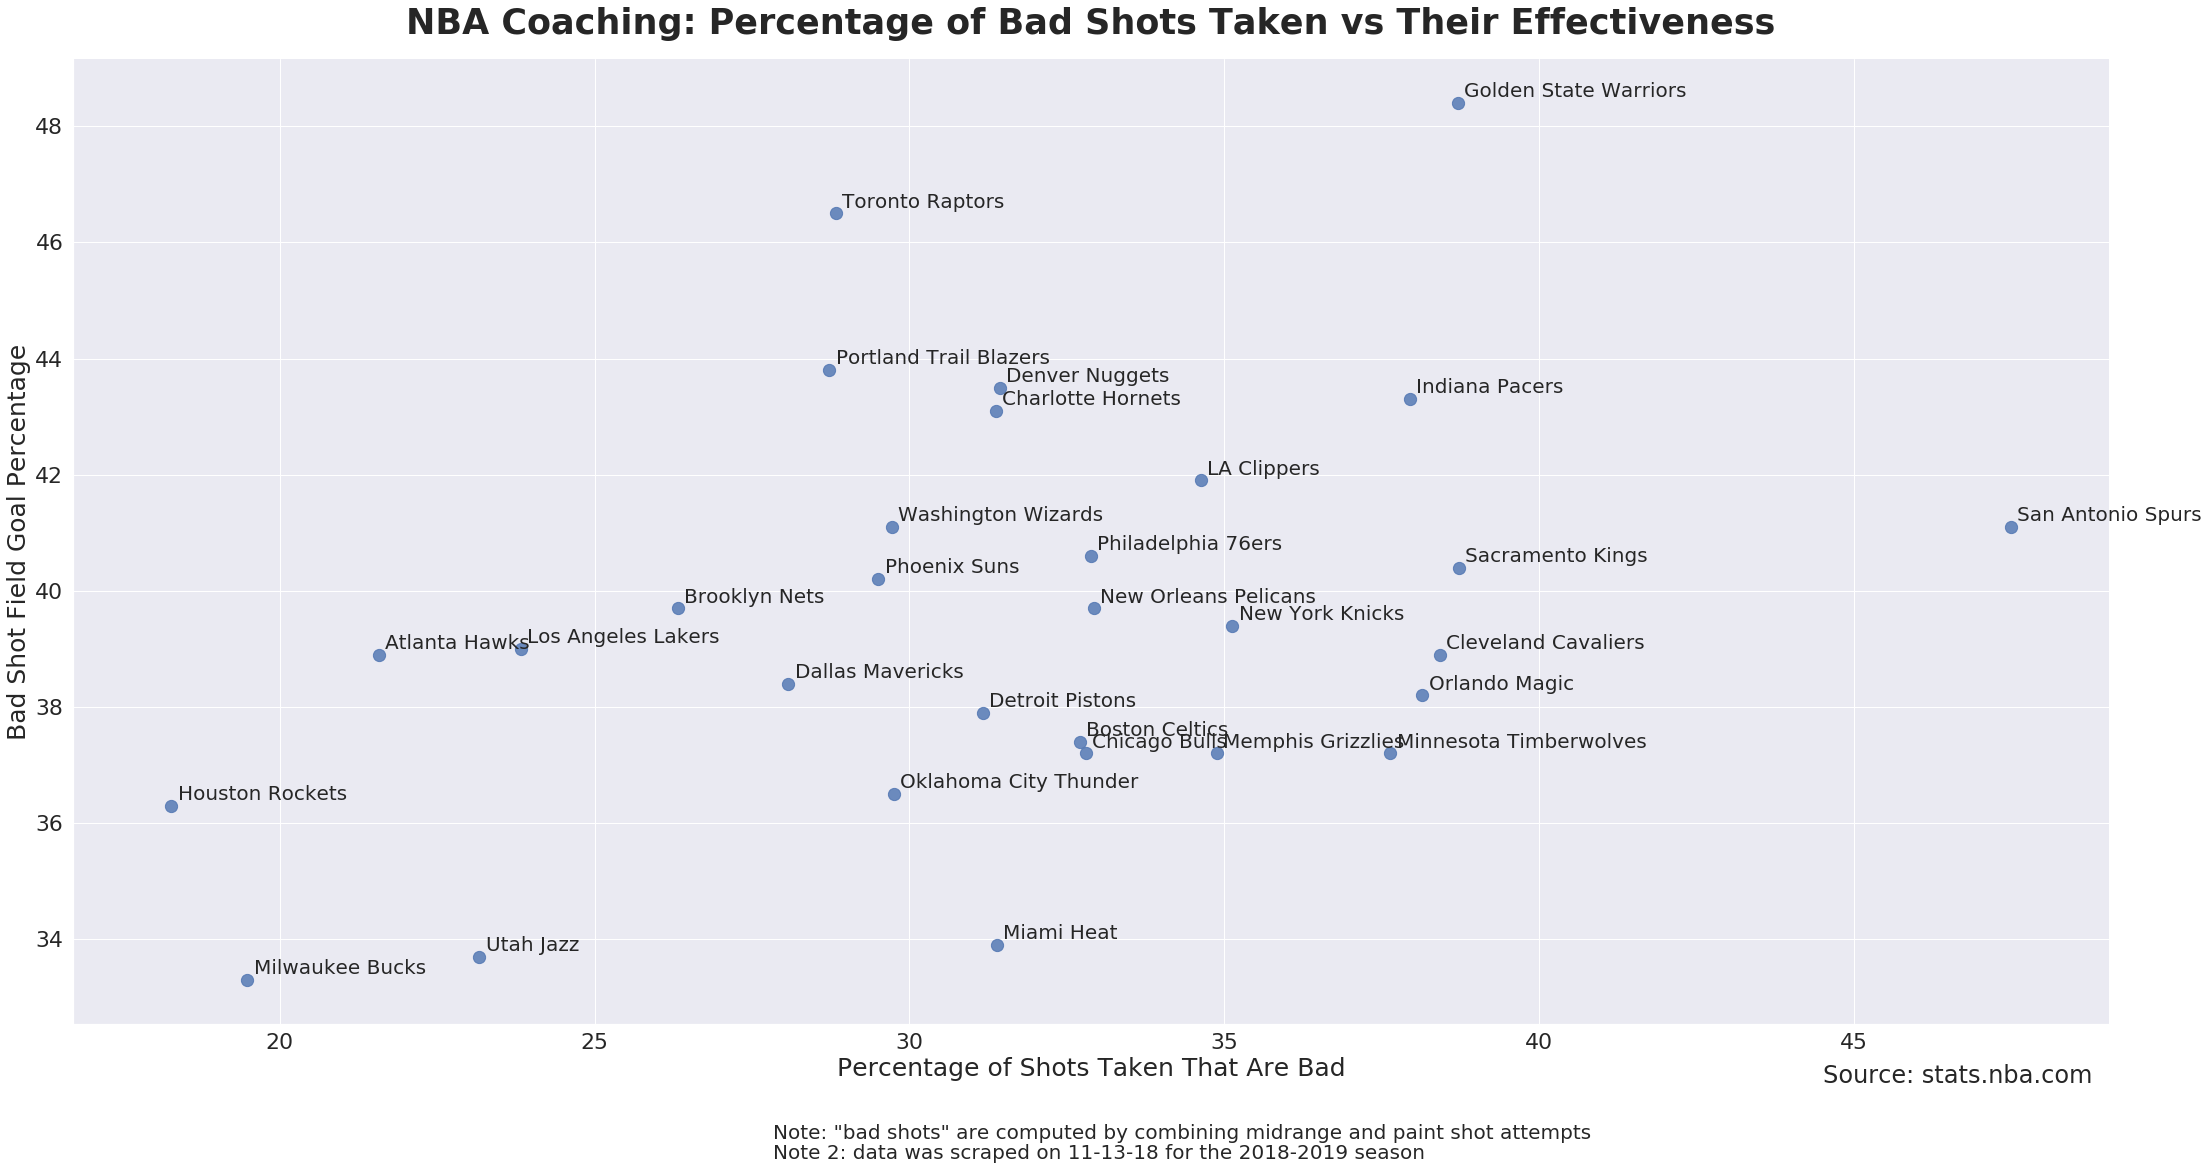

In [13]:
#Bad shot FG% by team
sns.set(font_scale=2)
ax5 = sns.lmplot('Bad Shots Taken %', # Horizontal axis
        'Bad Shots FG%', # Vertical axis
        data=df, # Data source
        fit_reg=False, # Don't fix a regression line
        markers='o',
        scatter_kws={"s": 150}, #Changes the Marker Size
        height=15,
        palette='deep',
        aspect=2) # size and dimension

plt.title('NBA Coaching: Percentage of Bad Shots Taken vs Their Effectiveness', pad=25 ,fontsize=35, weight = 600)
# Set x-axis label
plt.xlabel('Percentage of Shots Taken That Are Bad', fontsize=25)
# Set y-axis label
plt.ylabel('Bad Shot Field Goal Percentage', fontsize=25)

plt.annotate('Source: stats.nba.com', (0, 0), (1750, -40), xycoords='axes fraction', textcoords='offset points', va='top')

plt.annotate('Note: "bad shots" are computed by combining midrange and paint shot attempts', (0, 0), (700, -100), xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 20)
plt.annotate('Note 2: data was scraped on 11-13-18 for the 2018-2019 season', (0, 0), (700, -120), xycoords='axes fraction', textcoords='offset points', va='top', fontsize = 20)



label_point(df['Bad Shots Taken %'], df['Bad Shots FG%'], df['Team'], plt.gca())
ax5.savefig("bad-shots-taken-vs-fg.png")